<a href="https://colab.research.google.com/github/NourhanTamer20/Spam-Sms-Detection/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt

**Read Dataset**

In [2]:
data = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Data Cleaning**

In [3]:
data['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [4]:
##Check For Null Values in  dataset
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.duplicated().sum() ## Will give us a number of duplicates

403

In [6]:
data.drop_duplicates(inplace = True)

In [7]:
## remove unnecessary columns
data = data.drop(["Unnamed: 2","Unnamed: 3" ,"Unnamed: 4"] , axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data = data.dropna()

In [9]:
print(data)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5169 rows x 2 columns]


In [10]:
dshape=data.shape
dshape

(5169, 2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [12]:
dt=pd.get_dummies(data,columns=["v1"],drop_first=True)

In [13]:
dt

,v2,v1_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [14]:
print(dt['v1_spam'].value_counts())

0    4516
1     653
Name: v1_spam, dtype: int64


In [28]:
dt.rename(columns={'v1_spam':'target', 'v2':'sms'}, inplace=True)
dt

,sms,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


**Data Visualization**

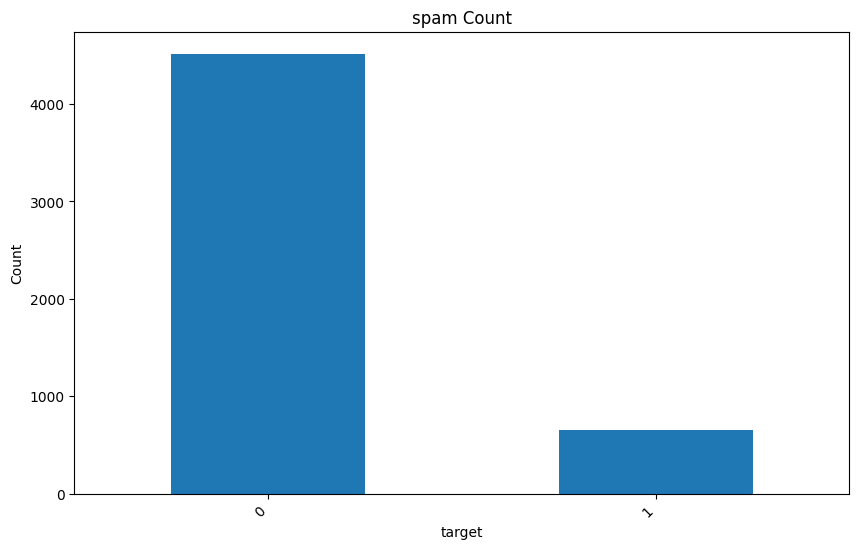

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
Exited_counts = dt["target"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("target")
plt.ylabel("Count")
plt.title("spam Count")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='target'>

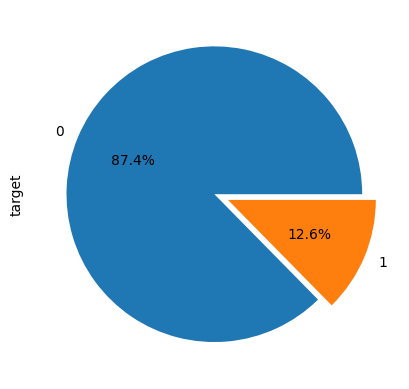

In [32]:
# Plotting the pie chart for target
data['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

**Data Preprocessing**

In [34]:
import nltk
"""
Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences
"""
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
dt['sentences_count'] = dt['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [36]:
dt['words_count'] = dt['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [37]:
dt['characters_count'] = dt['sms'].apply(len)

In [38]:
dt.head()

,sms,target,sentences_count,words_count,characters_count
0,"Go until jurong point, crazy.. Available only ...",0,2,24,111
1,Ok lar... Joking wif u oni...,0,2,8,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,2,37,155
3,U dun say so early hor... U c already then say...,0,1,13,49
4,"Nah I don't think he goes to usf, he lives aro...",0,1,15,61


In [39]:
"""Lower text
Tokenization: for example transform 'how are you' into -> ['how', 'are', 'you']
Remove special characters
Remove stop words (the, is, are...etc) & punctuation
Stemming: for example transform cretive, creating, created, creating into -> create"""

"Lower text\nTokenization: for example transform 'how are you' into -> ['how', 'are', 'you']\nRemove special characters\nRemove stop words (the, is, are...etc) & punctuation\nStemming: for example transform cretive, creating, created, creating into -> create"

In [49]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
#Stemmers remove morphological affixes from words, leaving only the word stem

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [51]:
def preprocess_text(text):
    # lower text
    text = text.lower()

    # tokenization
    text = nltk.word_tokenize(text)

    # remove special characters
    text = [i for i in text if i.isalnum()]

    # remove stop words & punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # stemming
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]

    return " ".join(text)

In [52]:
dt['text_transformed'] = dt['sms'].apply(preprocess_text)

**Build The Model**

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [55]:
X = cv.fit_transform(dt['text_transformed']).toarray()

In [56]:
X.shape

(5169, 6708)

In [57]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
y = dt['target'].values

In [73]:
y.shape

(5169,)

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [60]:
from sklearn.model_selection import train_test_split
# remember before that our dataset is not balanced that's why we use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [61]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [74]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [66]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [71]:
#The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).
model= MultinomialNB()

In [72]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test,y_pred , average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.9730374830082098
Recall: 0.971953578336557
Accuracy: 0.971953578336557


In [69]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       903
           1       0.86      0.92      0.89       131

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [75]:
# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[884  19]
 [ 10 121]]
